In [6]:
%pip install tf_keras_vis tflite-support-nightly

from bing_image_downloader import downloader

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Create your dataset

1) Choose which classes you would like to add.

2) Create a dataset with your own photos

3) Separate your dataset into train and test subsets.

In [15]:
QUERIES = [
    "Chess King", "Chess Queen", "Chess Rook",
    "Chess Bishop", "Chess Knight", "Chess Pawn"
]
OUTPUT_DIR_BASE = '/dataset_images_part2'
NB_IMAGES = 50

#for query in QUERIES:
#    downloader.download(
#        query, limit = NB_IMAGES,  output_dir=OUTPUT_DIR_BASE,
#        adult_filter_off=False, force_replace=False, timeout=15
#    )

In [20]:
#lABEL_PATH = 'labels.txt'
TRAINING_DATASET_PATH = 'dataset_images_part2/training_dataset/'
TEST_DATASET_PATH = 'dataset_images_part2/test_dataset/'

In [21]:
LABEL_NAMES = []
with open(lABEL_PATH) as f:
    LABEL_NAMES = f.read().split('\n')
NB_CLASSES = len(LABEL_NAMES)
LABEL_NAMES
QUERIES = [
   "Chess King", "Chess Queen", "Chess Rook",
    "Chess Bishop", "Chess Knight", "Chess Pawn",
]

FileNotFoundError: [Errno 2] No such file or directory: 'labels.txt'

In [23]:
import os
import pandas as pd
from glob import glob

path = OUTPUT_DIR_BASE

def create_dataframe_from_directories(path):
    data = []

    for label_dir in os.listdir(path):
        if os.path.isfile(label_dir):
            continue

        label_path_path = os.path.join(path, label_dir)
        for file in os.listdir(label_path_path):
            data.append([os.path.join(label_path_path, file), label_dir])
        
    return pd.DataFrame(data, columns = ["path", "label"])

In [27]:
train_df = create_dataframe_from_directories(TRAINING_DATASET_PATH)
train_df

,path,label
0,dataset_images_part2/training_dataset/Chess Bi...,Chess Bishop
1,dataset_images_part2/training_dataset/Chess Bi...,Chess Bishop
2,dataset_images_part2/training_dataset/Chess Bi...,Chess Bishop
3,dataset_images_part2/training_dataset/Chess Bi...,Chess Bishop
4,dataset_images_part2/training_dataset/Chess Bi...,Chess Bishop
...,...,...
240,dataset_images_part2/training_dataset/Chess Ro...,Chess Rook
241,dataset_images_part2/training_dataset/Chess Ro...,Chess Rook
242,dataset_images_part2/training_dataset/Chess Ro...,Chess Rook
243,dataset_images_part2/training_dataset/Chess Ro...,Chess Rook


In [28]:
test_df = create_dataframe_from_directories(TEST_DATASET_PATH)
test_df

,path,label
0,dataset_images_part2/test_dataset/Chess Bishop...,Chess Bishop
1,dataset_images_part2/test_dataset/Chess Bishop...,Chess Bishop
2,dataset_images_part2/test_dataset/Chess Bishop...,Chess Bishop
3,dataset_images_part2/test_dataset/Chess Bishop...,Chess Bishop
4,dataset_images_part2/test_dataset/Chess Bishop...,Chess Bishop
5,dataset_images_part2/test_dataset/Chess Bishop...,Chess Bishop
6,dataset_images_part2/test_dataset/Chess Bishop...,Chess Bishop
7,dataset_images_part2/test_dataset/Chess Bishop...,Chess Bishop
8,dataset_images_part2/test_dataset/Chess Bishop...,Chess Bishop
9,dataset_images_part2/test_dataset/Chess Bishop...,Chess Bishop


In [26]:
LABEL_NAMES = pd.unique(train_df['label'])
LABEL_NAMES

array(['Chess Bishop', 'Chess King', 'Chess Knight', 'Chess Pawn',
       'Chess Queen', 'Chess Rook'], dtype=object)

**TODO**: Display some images of your dataset

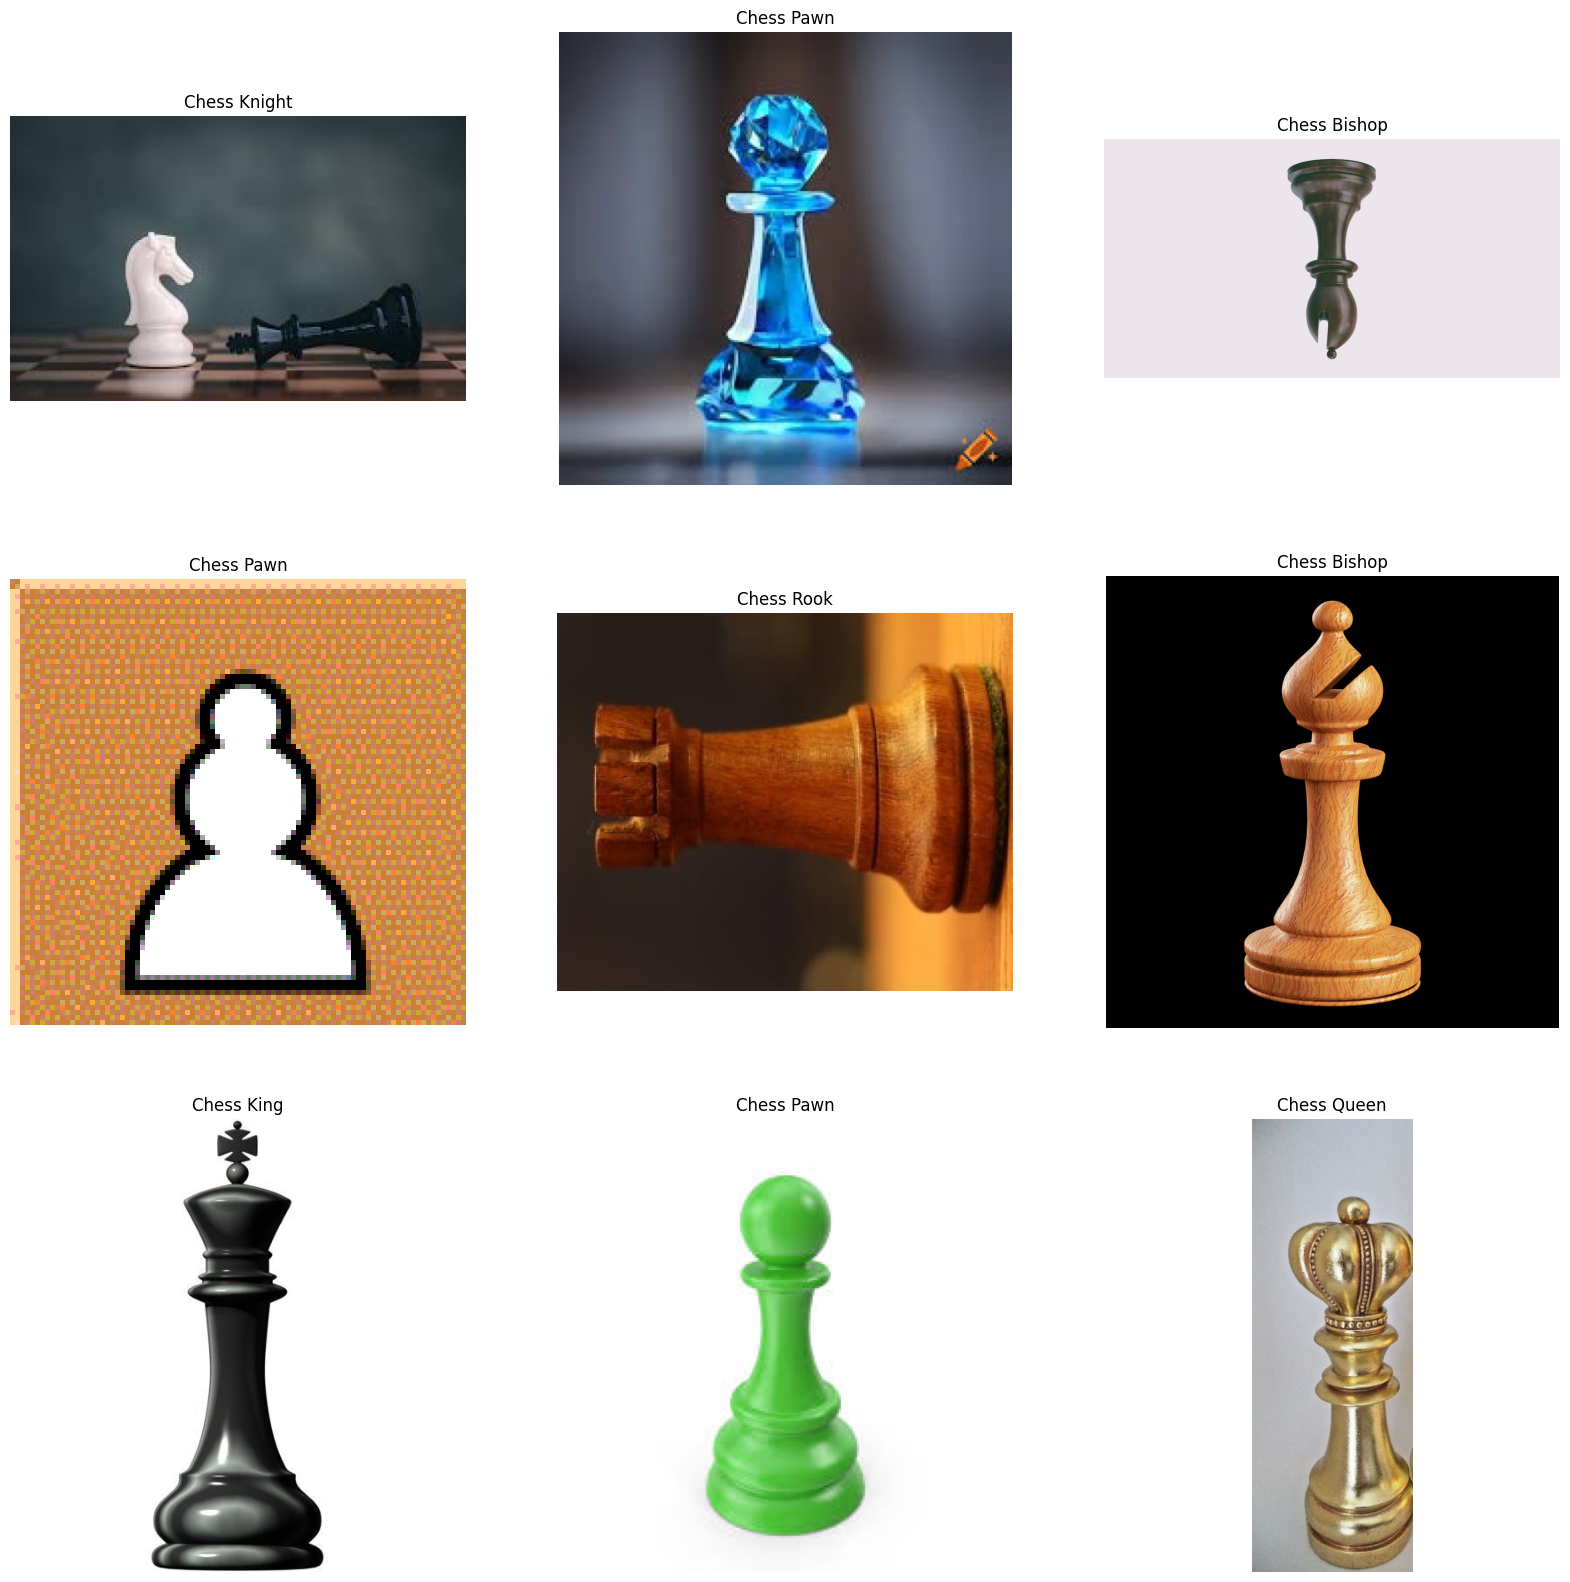

In [29]:
import matplotlib.pyplot as plt
import PIL
import PIL.Image
 
plt.figure(figsize=(20, 20))

i = 0
for _, rowdata in train_df.sample(frac=1).head(9).iterrows():
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(PIL.Image.open(rowdata.path))
    plt.title(rowdata.label)
    plt.axis("off")
    i += 1

# Explore your dataset

**TODO**: count the number of examples per classes and plot an histogram of it

In [30]:
def create_histogram(train, test):
    df1 = train.groupby('label').count()
    df2 = test.groupby('label').count()
    df = pd.merge(df1, df2, on='label')
    
    return df.plot.bar(title="Nombre d'images par classe",
                       xlabel='Classe',
                       ylabel="Nombre d'images").legend(["Train", "Test"])

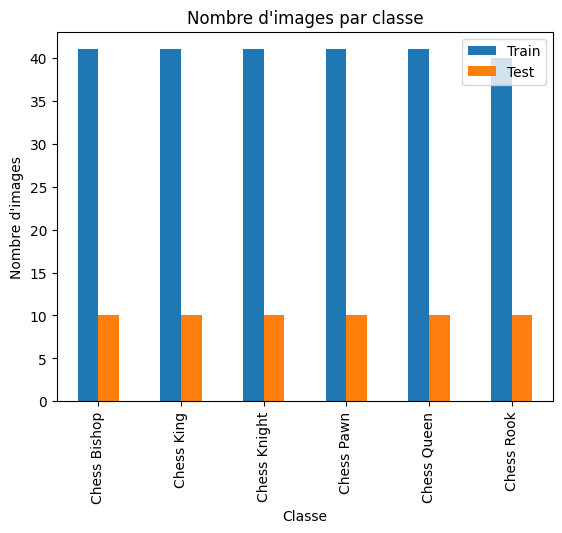

In [31]:
create_histogram(train_df, test_df)

# Preprocessing steps

In [14]:
from tensorflow.keras.layers import (
    Resizing, Rescaling,
)

from tensorflow.keras import Sequential

IMG_HEIGHT = 224
IMG_WIDTH = 224

image_preprocesses = Sequential([
    Resizing(IMG_HEIGHT, IMG_WIDTH, crop_to_aspect_ratio=True),
    Rescaling(1. / 255)
])

image_augmentations = Sequential([
    # TODO: choose some image augmentations layers
    # see which keras layers you can use
    # The kind of layers you will want to use starts with "Random".
    # See the following page for more information on data augmentation :
    # https://www.tensorflow.org/tutorials/images/data_augmentation
    RandomFlip("horizontal_and_vertical"),  # Applique un retournement aléatoire horizontal et vertical
    RandomRotation(0.2),  # Tourne les images de -20% à +20% des 360 degrés
    RandomZoom(0.2),  # Zoom aléatoire jusqu'à 20%
    RandomContrast(0.2)  # Ajuste le contraste de l'image de manière aléatoire dans l'intervalle spécifié
])

def open_images(paths):
    return np.stack([
        open_image(path) for path in paths
    ])

def open_image(path):
    with PIL.Image.open(path) as image:
        opened_img = image_preprocesses(np.asarray(image))
    
    return opened_img

def augment_images(images):
    return np.stack([
        image_augmentations(img) for img in images
    ])

2024-06-07 16:56:56.839786: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-07 16:56:56.845112: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-07 16:56:56.958066: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-07 16:56:57.403184: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-07 16:56:59.721550: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

**TODO**: plot examples of preprocessed and augmented images

## Define model

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import Model
from tensorflow.keras.layers import (
    GlobalAveragePooling2D,
    Dense,
    Dropout
)

def get_model():
    base_model = MobileNetV2(
        input_shape=(224, 224, 3),
        weights='imagenet',
        include_top=False
    )
    
    layers = base_model.output

    added_layers = [
        # important, we need global average pooling instead of flatten for class activation map later on 
        GlobalAveragePooling2D(), 
        # TODO: ...
    ]

    model = Model(inputs=base_model.input, outputs=Sequential(added_layers)(layers))

    # TODO: freeze layers
    
    model.compile(
      optimizer = RMSprop(),
      loss = SparseCategoricalCrossentropy(),
      metrics = ['acc']
    )
        
    return model

In [ ]:
get_model().summary()

# Model training

**TODO**: cross-validate your model, you can base yourself on the code from the first part of this practical work

**NOTE**: you shouldn't augment validations images. What we want to evaluate is the performances on "real" images, not on images that are augmented and change all the time 

# Results

**TODO**: plot the results from your crossvalidation

## Evaluate model on test set

**TODO**: when you've selected a final model, evaluate its performances (f-score, confusion matrix, ...) on your test set

### Display some misclassified images

**TODO**: display some misclassified images to be able to see what images are difficult for the model

## Use grad-cam to inspect how the model classify
Here we can see an heatmap of the regions that activates the model the most.

### For more information:
- tf-keras-vis documentation: https://keisen.github.io/tf-keras-vis-docs/
- Grad-cam paper: https://arxiv.org/pdf/1610.02391.pdf
- Grad-cam++ paper: https://arxiv.org/pdf/1710.11063.pdf

**NOTE**: maybe you will need to adapt some variable names based on your code above. For example, _model_ should be the model trained on all the training data. 

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from tensorflow.keras.applications import MobileNetV2
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

# Create GradCAM++ object
gradcam = GradcamPlusPlus(
    model,
    model_modifier=ReplaceToLinear(),
    clone=True,
)

nb_images_per_class = 10

fig, axs = plt.subplots(nb_images_per_class, len(LABEL_NAMES), figsize=(len(LABEL_NAMES) * 5, nb_images_per_class * 5))

for label_idx, label_name in enumerate(LABEL_NAMES):
    axs[0,label_idx].set_title(label_name, loc='center', y=1.1)
    
    i = 0
    for _, rowdata in train_df[train_df['label'] == label_name].sample(frac=1).head(nb_images_per_class).iterrows():
        img = open_image(rowdata.path)    
        pred = model(np.expand_dims(img, axis=0))

        # Generate cam with GradCAM++
        score = CategoricalScore(np.argmax(pred))
        cam = gradcam(score, img)
        heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)

        axs[i,label_idx].imshow(img, vmin=0, vmax=1)
        axs[i,label_idx].imshow(heatmap, cmap='jet', alpha=0.5) # overlay
        axs[i,label_idx].axis("off")

        i += 1

### Grad-cam on misclassified images

**TODO**: now do the same than above, but with the misclassified images. You shouldn't change anything pertaining to grad-cam besides on which image and prediction you do it

**TODO**: try to determine what caused the misclassifcations and what you can do about it